In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [ ]:
def newton_interpolation(x, y, n, xi):
    fdd = [[0.0 for _ in range(n + 1)] for _ in range(n + 1)]
    yint = [0.0] * (n + 1)
    ea = [0.0] * (n + 1)

    for i in range(n + 1):
        fdd[i][0] = y[i]

    for j in range(1, n + 1):
        for i in range(n + 1 - j):
            fdd[i][j] = (fdd[i + 1][j - 1] - fdd[i][j - 1]) / (x[i + j] - x[i])

    xterm = 1.0
    yint[0] = fdd[0][0]

    for order in range(1, n + 1):
        xterm *= (xi - x[order - 1])
        yint[order] = yint[order - 1] + fdd[0][order] * xterm

    for order in range(1, n + 1):
        ea[order] = yint[order] - yint[order - 1]

    return yint[n], ea[n]

# Example usage:
x = [1.0, 2.0, 3.0, 4.0, 5.0]
y = [1.0, 4.0, 9.0, 16.0, 25.0]
n = 4
xi = 2.5

result, error = newton_interpolation(x, y, n, xi)
print(f'Interpolated value at xi = {xi}: {result}')
print(f'Error estimate: {error}')


Interpolated value at xi = 2.5: 6.25
Error estimate: 0.0


In [ ]:
def NewInt(x,y,n,xi,yint,ea):
  fdd = [[0.0 for _ in range(n+1)] for _ in range(n+1)]
  for i in range(n+1):
    fdd[i][0] = y[i]
  for j in range(1,n+1):
    for i in range(n+1-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j] - x [i])
  xterm = 1
  yint[0] = fdd[0][0]

  for order in range(1,n+1):
    xterm = xterm*(xi - x[order-1])
    yint2 = yint[order-1] + fdd[0][order]*xterm
    ea[order-1] =  yint2 - yint[order-1]
    yint[order] = yint2
  return yint[n], ea

# Example usage:
x = [1,4,6,5,3,1.5,2.5,3.5]
y = [0,1.3862944,1.7917595,1.6094379,1.0986123,0.4054641,0.9162907,1.2527630]
n = 7
xi = 2
yint = [0.0] * (n + 1)
ea = [0.0] * (n + 1)

result, error = NewInt(x, y, n, xi,yint,ea)
print(f'Interpolated value at xi = {xi}: {result}')
print(f'Error estimate: {error}')

Interpolated value at xi = 2: 0.6934383504761904
Error estimate: [0.4620981333333333, 0.10374623333333327, 0.06292433333333303, 0.04695310000000086, 0.021791492698412407, -0.003616042539682729, -0.00045889968253975955, 0.0]


    function lagrange_interpolation(data_points, x):
    result = 0
    n = length(data_points)  # Number of data points
    
    for i from 0 to n-1:
        term = data_points[i].y  # Get the y-value of the data point
        
        for j from 0 to n-1:
            if i ≠ j:
                term = term * (x - data_points[j].x) / (data_points[i].x - data_points[j].x)
        
        result = result + term  # Accumulate the terms
    
    return result


In [ ]:
#= 0.05 is out of range.
#At x = 0.25, interpolated y = 1.6875000000000002
#At x = 0.55, interpolated y = 3.0075000000000003
#At x = 0.75, interpolated y = 4.1875
#At x = 0.95, interpolated y = 5.607499999999999*/

Enter Number of Data Points 6
X[0]: 0
Y[0]: 1
X[1]: 0.2
Y[1]: 1.52
X[2]: 0.4
Y[2]: 2.28
X[3]: 0.6
Y[3]: 3.28
X[4]: 0.8
Y[4]: 4.52
X[5]: 1
Y[5]: 6
      X       Y
0  0.05  1.1075
1  0.25  1.6875
2  0.55  3.0075
3  0.75  4.1875
4  0.95  5.6075


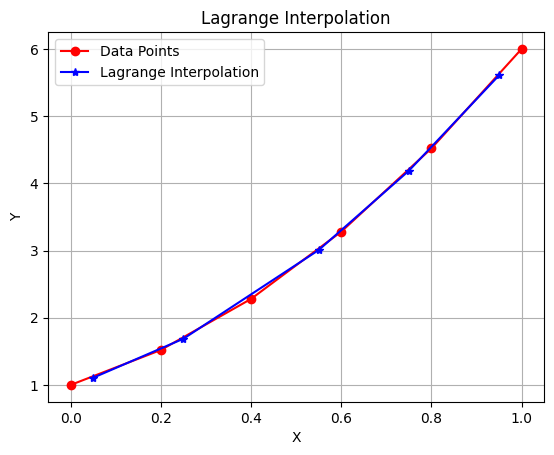

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(data_points, x):
    result = 0
    n = len(data_points)
    for i in range(n):
        term = data_points[i][1]
        for j in range(n):
            if j != i:
                term *= (x - data_points[j][0]) / (data_points[i][0] - data_points[j][0])
        result += term
    return result

data_points = []
n = int(input("Enter Number of Data Points "))
for i in range(n):
    x = float(input('X[' + str(i) + "]: "))
    y = float(input('Y[' + str(i) + "]: "))
    data_points.append((x, y))

# Generate x-values for plotting
x_values = [0.05, 0.25, 0.55, 0.75, 0.95]
y_values = []
# Calculate interpolated y-values for the x-values
for xx in x_values:
    ii = 0
    for i in range(n):
        if data_points[i][0] >= xx:
            ii = i
            break

    if ii == 0 or ii == 1:
        yy = [data_points[ii][1], data_points[ii + 1][1], data_points[ii + 2][1]]
        xx_values = [data_points[ii][0], data_points[ii + 1][0], data_points[ii + 2][0]]
        merged_data = list(zip(xx_values, yy))

        y_values.append(lagrange_interpolation(merged_data, xx))
    elif ii == n-1:
        yy = [data_points[ii][1], data_points[ii - 1][1], data_points[ii - 2][1]]
        xx_values = [data_points[ii][0], data_points[ii - 1][0], data_points[ii - 2][0]]
        merged_data = list(zip(xx_values, yy))

        y_values.append(lagrange_interpolation(merged_data, xx))


    else:
        yy = [data_points[ii][1], data_points[ii - 1][1], data_points[ii - 2][1]]
        xx_values = [data_points[ii][0], data_points[ii - 1][0], data_points[ii - 2][0]]
        merged_data = list(zip(xx_values, yy))

        y_values.append(lagrange_interpolation(merged_data, xx))




data = pd.DataFrame({'X': x_values, 'Y': y_values})

print(data)

# Plot the original data points
plt.plot(*zip(*data_points), label="Data Points", color='red', marker='o')

# Plot the interpolated curve
plt.plot(x_values, y_values, label="Lagrange Interpolation", color='blue',marker='*')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Lagrange Interpolation')
plt.show()


Enter Number of Data Points 5
X[0]: 1
Y[0]: 800
X[1]: 3
Y[1]: 2310
X[2]: 5
Y[2]: 3090
X[3]: 7
Y[3]: 3940
X[4]: 13
Y[4]: 4755
    X            Y
0   8  4256.562500
1   9  4500.833333
2  10  4672.812500
3  11  4772.500000
4  12  4799.895833


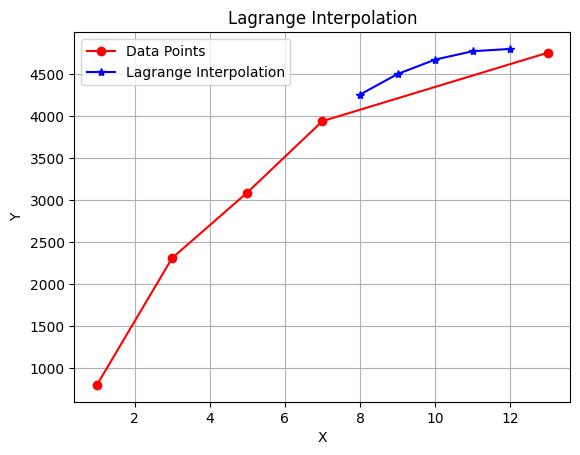

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(data_points, x):
    result = 0
    n = len(data_points)
    for i in range(n):
        term = data_points[i][1]
        for j in range(n):
            if j != i:
                term *= (x - data_points[j][0]) / (data_points[i][0] - data_points[j][0])
        result += term
    return result

data_points = []
n = int(input("Enter Number of Data Points "))
for i in range(n):
    x = float(input('X[' + str(i) + "]: "))
    y = float(input('Y[' + str(i) + "]: "))
    data_points.append((x, y))

# Generate x-values for plotting
x_values = [8,9,10,11,12]
y_values = []
# Calculate interpolated y-values for the x-values
for xx in x_values:
    ii = 0
    for i in range(n):
        if data_points[i][0] >= xx:
            ii = i
            break

    if ii == 0 or ii == 1:
        yy = [data_points[ii][1], data_points[ii + 1][1], data_points[ii + 2][1]]
        xx_values = [data_points[ii][0], data_points[ii + 1][0], data_points[ii + 2][0]]
        merged_data = list(zip(xx_values, yy))

        y_values.append(lagrange_interpolation(merged_data, xx))
    elif ii == n-1:
        yy = [data_points[ii][1], data_points[ii - 1][1], data_points[ii - 2][1]]
        xx_values = [data_points[ii][0], data_points[ii - 1][0], data_points[ii - 2][0]]
        merged_data = list(zip(xx_values, yy))

        y_values.append(lagrange_interpolation(merged_data, xx))


    else:
        yy = [data_points[ii][1], data_points[ii - 1][1], data_points[ii - 2][1]]
        xx_values = [data_points[ii][0], data_points[ii - 1][0], data_points[ii - 2][0]]
        merged_data = list(zip(xx_values, yy))

        y_values.append(lagrange_interpolation(merged_data, xx))




data = pd.DataFrame({'X': x_values, 'Y': y_values})

print(data)

# Plot the original data points
plt.plot(*zip(*data_points), label="Data Points", color='red', marker='o')

# Plot the interpolated curve
plt.plot(x_values, y_values, label="Lagrange Interpolation", color='blue',marker='*')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Lagrange Interpolation')
plt.show()


Enter Number of Data Points 4
X[0]: 3.4
X[1]: 3.5
X[2]: 3.6
X[3]: 3.7
Enter no of x values for which you want calculate1
X[0]: 3.44
      X         Y
0  3.44  0.257436


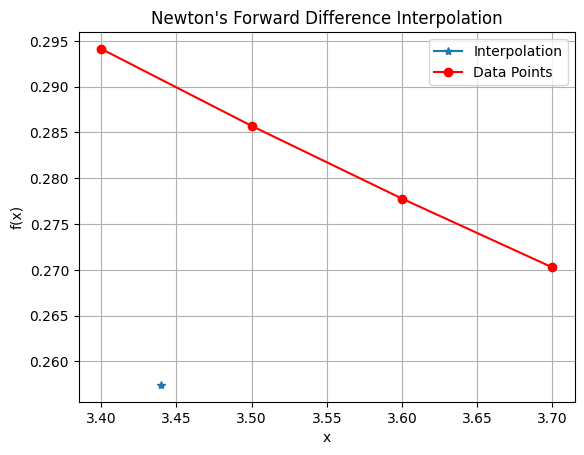

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import pandas as pd

def f(x):
    return 1 / x

data_points = []
n = int(input("Enter Number of Data Points "))

for i in range(n):
    x = float(input('X[' + str(i) + "]: "))
    y = f(x)
    data_points.append((x, y))

n = len(data_points)
forward_difference = np.zeros((n, n))

for i in range(n):
    forward_difference[i][0] = data_points[i][1]

for j in range(1, n):
    for i in range(n - j):
        forward_difference[i][j] = (forward_difference[i + 1][j - 1] - forward_difference[i][j - 1]) / (data_points[i + j][0] - data_points[i][0])

def newton_forward_interpolation(x, data_points, forward_difference):
    n = len(data_points)
    result = data_points[0][1]  # f(x0)
    s = (x - data_points[0][0] )/ (data_points[1][0] - data_points[0][0])

    for i in range(1, n):
        #temp *= (x - data_points[i - 1][0])
        result += (s * forward_difference[0][i])
        s *= (s-i)/mt.factorial(i+1)

    return result

# Interpolate at a specific point (e.g., x = 3.44)
x = []
x_values = []
n1 = int(input("Enter no of x values for which you want calculate"))
for k in range(n1):
   m = float(input('X[' + str(k) + "]: "))
   x.append((m))
   x_values.append((m))



# Calculate interpolated y values for the graph
y_values = [newton_forward_interpolation(x, data_points, forward_difference) for x in x_values]

data = pd.DataFrame({'X': x_values, 'Y': y_values})

print(data)
# Plot the graph
plt.plot(x_values, y_values,marker='*', label='Interpolation')
plt.plot([x for x, _ in data_points], [f for _, f in data_points], color='red', marker='o', label='Data Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton\'s Forward Difference Interpolation')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def f(x):
    return 1 / x

data_points = []
n = int(input("Enter Number of Data Points "))

for i in range(n):
    x = float(input('X[' + str(i) + "]: "))
    y = f(x)
    data_points.append((x, y))

n = len(data_points)
backward_difference = np.zeros((n, n))

for i in range(n):
    backward_difference[i][0] = data_points[i][1]

for j in range(1, n):
    for i in range(n - j):
        back_difference[i][j] = (back_difference[i + 1][j - 1] - back_difference[i][j - 1]) / (data_points[i + j][0] - data_points[i][0])


Coefficients of the cubic polynomial:
b0: 73.97529915477617
b1: -292.6252822241782
b2: 207.94750506139795
b3: -62.48716129974329
b4: 8.187037534686402
b5: 0.4889915464535879
b6: -0.2071489665965845
b7: -0.02463824209596042
b8: 0.010206087882638836
b9: -0.0007309188695650659


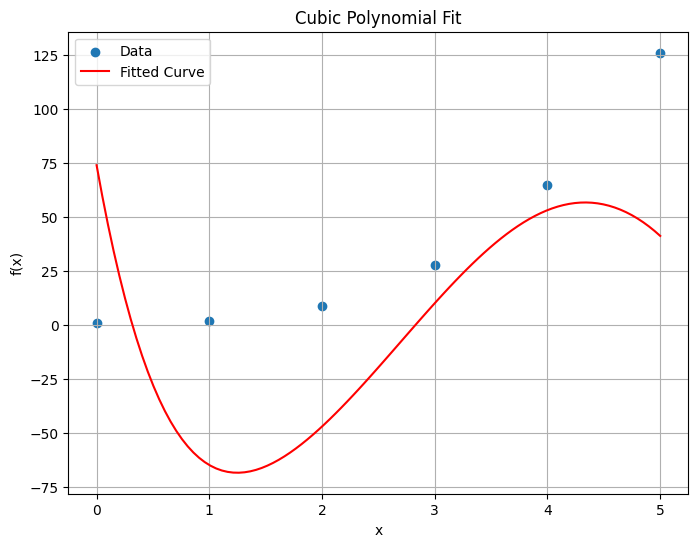

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input data points (x and y)
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 2, 9, 28, 65, 126])

# Define the 10 basis functions
def basis_functions(x):
    return [np.ones_like(x), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]

# Construct the design matrix
X = np.column_stack(basis_functions(x))

# Perform generalized least squares (GLS)
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the coefficients for the polynomial
print("Coefficients of the cubic polynomial:")
for i, coef in enumerate(beta):
    print(f"b{i}: {coef}")

# Generate points for the fitted curve
x_fit = np.linspace(0, 5, 100)
y_fit = np.dot(np.column_stack(basis_functions(x_fit)), beta)

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data")
plt.plot(x_fit, y_fit, label="Fitted Curve", color='red')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Cubic Polynomial Fit")
plt.grid(True)
plt.show()


Coefficients of the cubic polynomial:
b0: 73.97529915477617
b1: -292.6252822241782
b2: 207.94750506139795
b3: -62.48716129974329
b4: 8.187037534686402
b5: 0.4889915464535879
b6: -0.2071489665965845
b7: -0.02463824209596042
b8: 0.010206087882638836
b9: -0.0007309188695650659


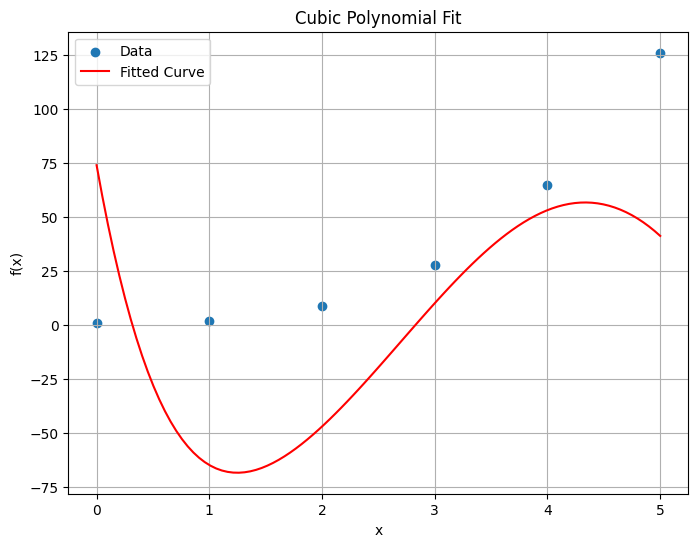

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input data points (x and y)
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 2, 9, 28, 65, 126])

# Define the 10 basis functions
def basis_functions(x):
    return [np.ones_like(x), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]

# Construct the design matrix
X = np.column_stack(basis_functions(x))

# Perform generalized least squares (GLS)
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the coefficients for the polynomial
print("Coefficients of the cubic polynomial:")
for i, coef in enumerate(beta):
    print(f"b{i}: {coef}")

# Generate points for the fitted curve
x_fit = np.linspace(0, 5, 100)
y_fit = np.dot(np.column_stack(basis_functions(x_fit)), beta)

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data")
plt.plot(x_fit, y_fit, label="Fitted Curve", color='red')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Cubic Polynomial Fit")
plt.grid(True)
plt.show()


f(1.0) = 0.8414454534157955
f(1.5) = 0.9974849507383062
f(2.0) = 0.9092870475984599
f(2.5) = 0.5984646945718746
f(3.0) = 0.14111838922726103


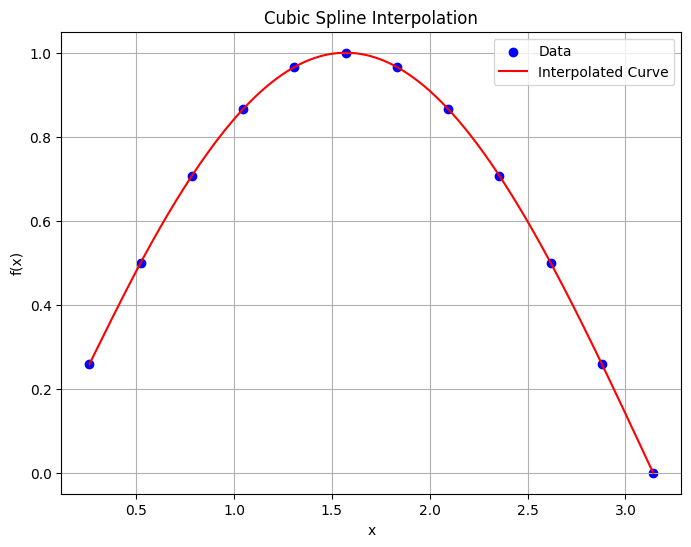

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the ordered pair of data (x and f(x))
x_data = np.array([0.261799, 0.523599, 0.785398, 1.047198, 1.308997, 1.570796, 1.832596, 2.094395, 2.356194, 2.617994, 2.879793, 3.141593])
fx_data = np.array([0.258819, 0.5, 0.707107, 0.866025, 0.965926, 1, 0.965926, 0.866025, 0.707107, 0.5, 0.258819, -3.2E-16])

# Create a CubicSpline object
cs = CubicSpline(x_data, fx_data, bc_type='natural')  # 'natural' sets boundary conditions

# Define the x-values where you want to interpolate
x_interp = np.array([1, 1.5, 2, 2.5, 3])

# Perform cubic spline interpolation
fx_interp = cs(x_interp)

# Print the predicted values
for xi, fxi in zip(x_interp, fx_interp):
    print(f"f({xi}) = {fxi}")

# Plot the original data and the interpolated curve
x_plot = np.linspace(min(x_data), max(x_data), 1000)
fx_plot = cs(x_plot)

plt.figure(figsize=(8, 6))
plt.scatter(x_data, fx_data, label="Data", color='blue')
plt.plot(x_plot, fx_plot, label="Interpolated Curve", color='red')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Cubic Spline Interpolation")
plt.grid(True)
plt.show()


In [18]:
import numpy as np
def eqn (x):
  return 1,x,x**2,x**3;

def matrix_F(x):
  n = len(x)
  F = np.zeros((n,4))
  for i in range (n):
      F[i][0],F[i][1],F[i][2],F[i][3] = eqn(x[i])
  return F

x = [0,1,2,3,4,5]
y =  [1,2,9,28,65,126]
y = np.array(y).reshape(6,1)

F = matrix_F(x)
F_tran = F.transpose()
y_Ft = np.dot(F_tran, y)
F_Ft = np.dot(F_tran, F)
a = np.linalg.solve(F_Ft, y_Ft)

print(str(a[0]) + " + " + str(a[1]) + " x + " + str(a[2]) + " x**2 + " + str(a[0]) + " x**3 ")




[1.] + [-4.4049333e-14] x + [2.38576393e-14] x**2 + [1.] x**3 


In [23]:
 import numpy as np
def eqn (x):
  return 1,x,x**2,x**3;

def matrix_F(x):
  n = len(x)
  F = np.zeros((n,4))
  for i in range (n):
      F[i][0],F[i][1],F[i][2],F[i][3] = eqn(x[i])
  return F

x = [0,1,2,3,4,5]
y =  [1,2,9,28,65,126]
y = np.array(y).reshape(6,1)

F = matrix_F(x)
F_tran = F.transpose()
y_Ft = np.dot(F_tran, y)
F_Ft = np.dot(F_tran, F)
a = np.linalg.solve(F_Ft, y_Ft)
print(str(a[0]) + " + " + str(a[1]) + " x + " + str(a[2]) + " x**2 + " + str(a[0]) + " x**3 ")




[1.] + [-4.4049333e-14] x + [2.38576393e-14] x**2 + [1.] x**3 


In [24]:
def cubic_spline_interpolation(x, y, xx):
    n = len(x)
    h = [x[i] - x[i - 1] for i in range(1, n)]

    # Calculate second derivatives (coefficients for tridiagonal matrix)
    A = [0] + [h[i] / (h[i - 1] + h[i]) for i in range(1, n - 1)] + [0]
    B = [1] + [2 * (h[i - 1] + h[i]) for i in range(1, n - 1)] + [1]
    C = [0] + [h[i - 1] / (h[i - 1] + h[i]) for i in range(1, n - 1)] + [0]
    D = [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) for i in range(1, n - 1)] + [0]

    # Solve the tridiagonal system
    for i in range(1, n):
        mult = A[i] / B[i - 1]
        B[i] -= mult * C[i - 1]
        D[i] -= mult * D[i - 1]

    # Back-substitution to find second derivatives
    M = [0] * n
    M[-1] = D[-1] / B[-1]

    for i in range(n - 2, -1, -1):
        M[i] = (D[i] - C[i] * M[i + 1]) / B[i]

    # Find the interval where xx lies
    for i in range(n - 1):
        if x[i] <= xx <= x[i + 1]:
            break

    # Perform interpolation
    h_i = x[i + 1] - x[i]
    A_i = (x[i + 1] - xx) / h_i
    B_i = 1 - A_i

    yy = (A_i * (M[i] * h_i ** 2 / 6) +
          B_i * (M[i + 1] * h_i ** 2 / 6) +
          A_i * y[i] +
          B_i * y[i + 1])

    return yy

# Sample data points
x = [0.0, 1.0, 2.0, 3.0, 4.0]
y = [1.0, 2.0, 3.0, 2.5, 1.0]

# Input value for interpolation
xx = 2.5

# Interpolate at the input value
result = cubic_spline_interpolation(x, y, xx)

print(f"The interpolated value at x={xx} is y={result:.4f}")


The interpolated value at x=2.5 is y=2.4698


In [ ]:
def cubic_spline_interpolation(x, y, xx):
    n = len(x)
    h = [x[i] - x[i - 1] for i in range(1, n)]


    A = [0] + [h[i] / (h[i - 1] + h[i]) for i in range(1, n - 1)] + [0]
    B = [1] + [2 * (h[i - 1] + h[i]) for i in range(1, n - 1)] + [1]
    C = [0] + [h[i - 1] / (h[i - 1] + h[i]) for i in range(1, n - 1)] + [0]
    D = [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) for i in range(1, n - 1)] + [0]
      for i in range(1, n):
        mult = A[i] / B[i - 1]
        B[i] -= mult * C[i - 1]
        D[i] -= mult * D[i - 1]


